In [48]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import os
from networks import *
from helper_fn import *

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [49]:
train_data = torch.tensor(np.load("data/pendulum_train.npy")).float()

In [52]:
model = torch.load("logs/denis_pendulum/models/model-denis-50-1579727340.pt", map_location=torch.device('cpu'))

In [53]:
model = model.eval()

In [54]:
enc_gt, enc_traj, ko = model(train_data)
ko = ko.detach().numpy()
enc_traj_0 = enc_traj.detach()[:, 0, :].numpy()

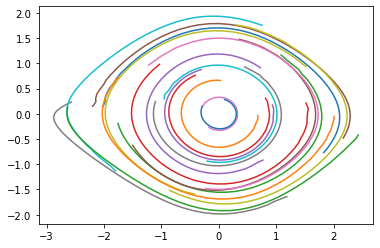

In [57]:
for i in range(20):
    plt.plot(enc_traj[i+100, :, 0].detach().numpy(), enc_gt[i+100, :, 1].detach().numpy())

In [13]:
eig_fns = []
eig_vals = []
for idx, k in enumerate(ko):
    w, vs = np.linalg.eig(k)
    eig_vals.append(w)
    eigf = np.matmul(enc_traj_0[idx], vs)

    eig_fns.append(eigf)
eig_fns = np.asarray(eig_fns)
eig_vals = np.asarray(eig_vals)

In [46]:
def plot_eigen_func(ko, enc_traj, data, show=False, num=3,
                    fig_dir='eigen_funcs.png'):
    eig_fns = []
    eig_vals = []
    for idx, k in enumerate(ko):
        w, vs = np.linalg.eig(k)
        eig_vals.append(w)
        eigf = np.matmul(enc_traj[idx], vs)

        eig_fns.append(eigf)
    eig_fns = np.asarray(eig_fns)
    eig_vals = np.asarray(eig_vals)

    fig, ax = plt.subplots(num, 2, figsize=(15, 10))

    x = data[:, 0, 0].numpy()
    y = data[:, 0, 1].numpy()

    for i in range(num):
        z = np.abs(eig_fns[:, 2*i])
        phi = np.angle(eig_fns[:, 2*i]/eig_fns[:, 2*i+1])
        im = ax[i, 0].tricontourf(x, y, z, cmap='Purples', levels=100)
        im2 = ax[i, 1].tricontourf(x, y, phi, cmap='PuOr', levels=100)
        ax[i, 0].set_axis_off()
        ax[i, 1].set_axis_off()
        #plt.colorbar(im, ax=ax[i, 0], orientation="horizontal", pad=0.1)
        #plt.colorbar(im2, ax=ax[i, 1], orientation="horizontal", pad=0.1)
    if show:
        plt.show()
    else:
        plt.savefig(fig_dir, bbox_inches='tight')
        plt.close()

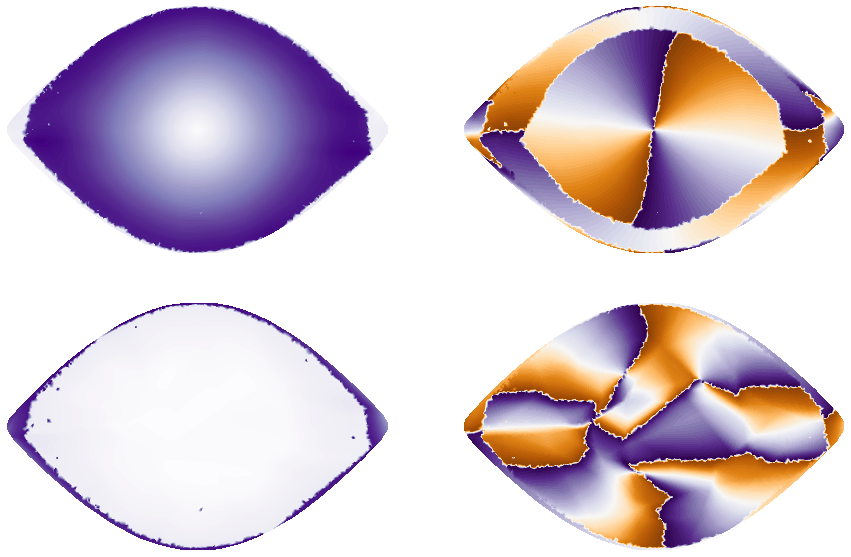

In [47]:
plot_eigen_func(ko, enc_traj_0, train_data, show=True, num=2)